In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
# Load and preprocess the dataset
def load_dataset(data_folders):
    X, y = [], []
    for label, data_folder in enumerate(data_folders):
        try:
            for filename in os.listdir(data_folder):
                img_path = os.path.join(data_folder, filename)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
                    img_array = tf.keras.preprocessing.image.img_to_array(img)
                    X.append(img_array)
                    y.append(label)
                except Exception as e:
                    print(f"Error processing image '{filename}' in folder '{data_folder}': {e}")
        except FileNotFoundError:
            print(f"Folder '{data_folder}' not found.")
        except Exception as e:
            print(f"An error occurred while processing folder '{data_folder}': {e}")
    if len(X) == 0:
        raise ValueError("No images found in the provided folders.")
    X = np.array(X)
    y = np.array(y)
    return X, y

# Paths to augmented folders
augmented_class_0_path = r"F:\CE19909_EFTI\dataset6\dataset_temp\augmented_class_0"
augmented_class_1_path = r"F:\CE19909_EFTI\dataset6\dataset_temp\augmented_class_1"

# Load the dataset with error handling
try:
    X, y = load_dataset([augmented_class_0_path, augmented_class_1_path])
except ValueError as ve:
    print("ValueError:", ve)
    # Handle this exception appropriately, e.g., by exiting the program or providing default data
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    # Handle other exceptions here


Error processing image '1 (463)_zoomed.jpg' in folder 'F:\CE19909_EFTI\dataset6\dataset_temp\augmented_class_1': broken data stream when reading image file


In [3]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [4]:
# Print counts
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 2128
Validation set size: 266
Test set size: 267


In [5]:
#Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for train, validation, and test sets
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = train_datagen.flow(X_val, y_val, batch_size=32)
test_generator = train_datagen.flow(X_test, y_test, batch_size=32)


In [6]:
# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)



In [8]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(train_generator, epochs=50, validation_data=val_generator)


Epoch 1/50
67/67 [==============================] - 12s 103ms/step - loss: 0.3802 - accuracy: 0.8379 - val_loss: 0.2656 - val_accuracy: 0.8985
Epoch 2/50
67/67 [==============================] - 5s 72ms/step - loss: 0.2623 - accuracy: 0.8966 - val_loss: 0.3786 - val_accuracy: 0.8195
Epoch 3/50
67/67 [==============================] - 5s 72ms/step - loss: 0.2431 - accuracy: 0.9065 - val_loss: 0.2774 - val_accuracy: 0.8759
Epoch 4/50
67/67 [==============================] - 5s 72ms/step - loss: 0.1741 - accuracy: 0.9361 - val_loss: 0.2570 - val_accuracy: 0.8835
Epoch 5/50
67/67 [==============================] - 5s 72ms/step - loss: 0.1682 - accuracy: 0.9352 - val_loss: 0.3003 - val_accuracy: 0.8947
Epoch 6/50
67/67 [==============================] - 5s 72ms/step - loss: 0.1474 - accuracy: 0.9436 - val_loss: 0.2654 - val_accuracy: 0.8947
Epoch 7/50
67/67 [==============================] - 5s 73ms/step - loss: 0.1232 - accuracy: 0.9488 - val_loss: 0.4056 - val_accuracy: 0.8947
Epoch 8/50


In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

9/9 [==============================] - 1s 116ms/step - loss: 0.1817 - accuracy: 0.9551
Test accuracy: 0.9550561904907227


In [12]:
# Save the model
model_save_path = "google_net_binary_classification_model.h5"
model.save(model_save_path)
print("Model saved successfully at:", model_save_path)

Model saved successfully at: google_net_binary_classification_model.h5


1/1 [==============================] - 2s 2s/step


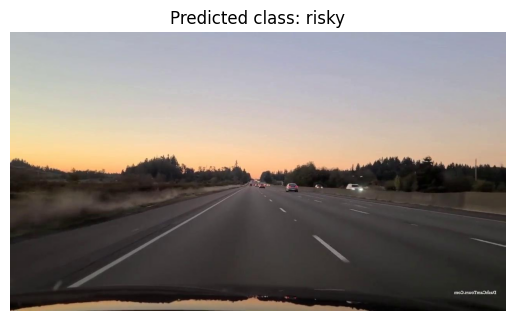

1/1 [==============================] - 0s 28ms/step


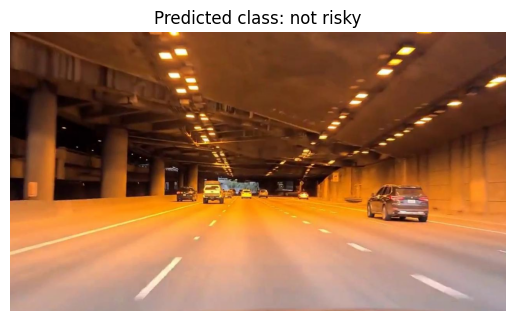

1/1 [==============================] - 0s 28ms/step


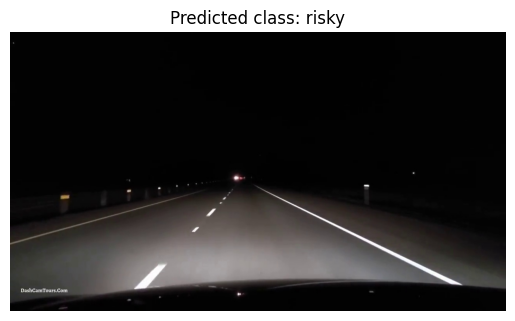

1/1 [==============================] - 0s 31ms/step


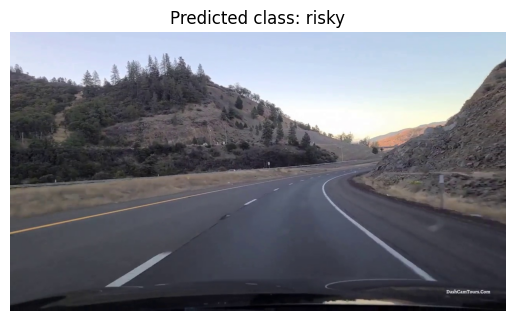

1/1 [==============================] - 0s 30ms/step


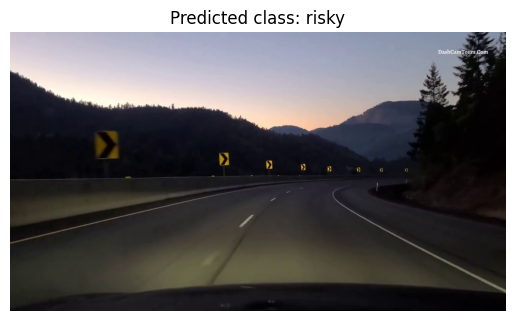

1/1 [==============================] - 0s 31ms/step


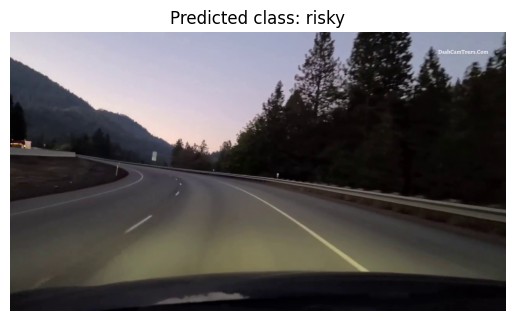

1/1 [==============================] - 0s 29ms/step


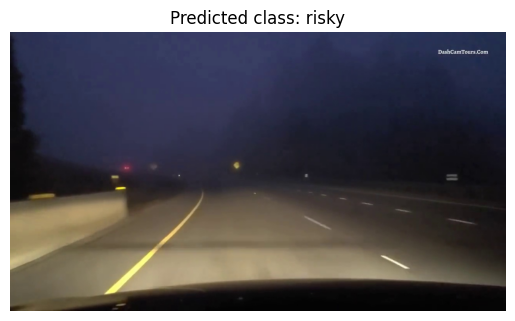

1/1 [==============================] - 0s 28ms/step


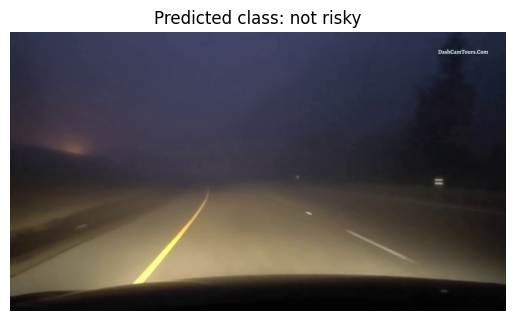

1/1 [==============================] - 0s 29ms/step


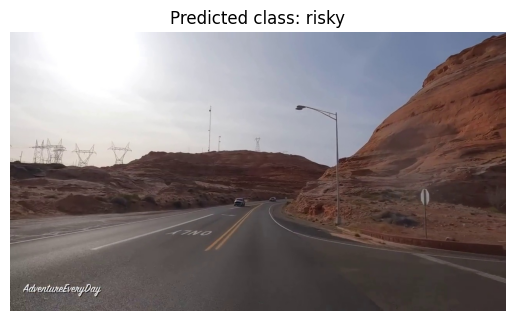

1/1 [==============================] - 0s 30ms/step


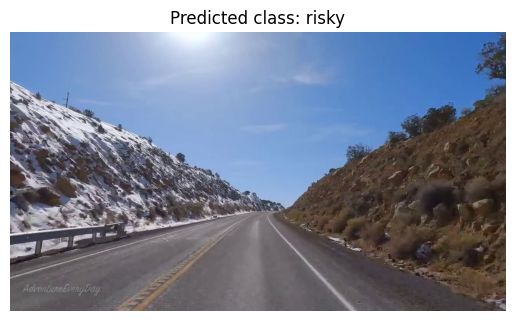

1/1 [==============================] - 0s 29ms/step


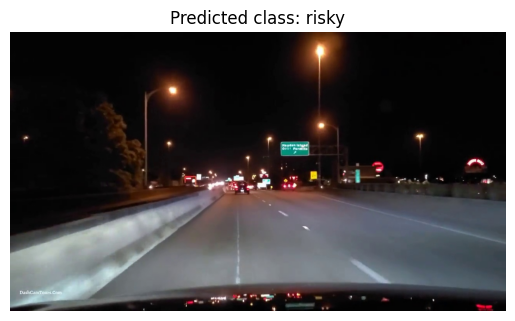

1/1 [==============================] - 0s 30ms/step


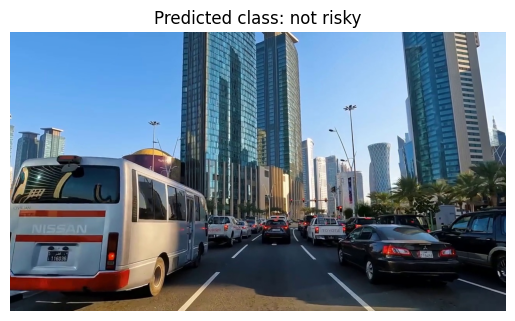

1/1 [==============================] - 0s 28ms/step


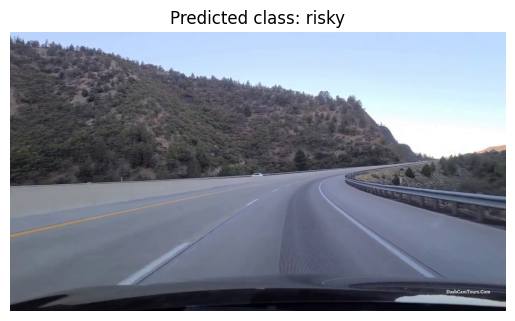

[('2 (185)_flipped.jpg', 1), ('2 (24)_zoomed.jpg', 0), ('test (1).jpg', 1), ('test (10).jpg', 1), ('test (11).jpg', 1), ('test (12).jpg', 1), ('test (13).jpg', 1), ('test (14).jpg', 0), ('test (2).jpg', 1), ('test (3).jpg', 1), ('test (4).jpg', 1), ('test (8).jpg', 0), ('test (9).jpg', 1)]


In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_on_images(model, image_folder):
    predictions = []
    class_labels = ['not risky', 'risky']
    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize images to the same size as the training images
            img = np.expand_dims(img, axis=0)  # Add batch dimension
            pred = model.predict(img)
            predicted_class = np.round(pred).astype(int)[0][0]  # Round the prediction to 0 or 1
            predictions.append((filename, predicted_class))
            # Display the image with its predicted class
            plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
            plt.title(f"Predicted class: {class_labels[predicted_class]}")
            plt.axis('off')
            plt.show()
    return predictions

# Call the function with your loaded model and test image folder
model_load_path = "google_net_binary_classification_model.h5"
model = tf.keras.models.load_model(model_load_path)
image_folder = r"F:\CE19909_EFTI\dataset6\dataset_temp\test"
predictions = predict_on_images(model, image_folder)
print(predictions)
